https://scikit-learn.org/stable/auto_examples/neighbors/plot_digits_kde_sampling.html#sphx-glr-auto-examples-neighbors-plot-digits-kde-sampling-py

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from https://www.openml.org/d/554
from sklearn.datasets import fetch_openml

from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [17]:
# load the data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = np.array([int(o) for o in y])
X = X[y==2]

In [18]:
# project the 64-dimensional data to a lower dimension
pca = PCA(n_components=20, whiten=False)
data = pca.fit_transform(X) 

In [19]:
# use grid search cross-validation to optimize the bandwidth
params = {'bandwidth': np.logspace(-1, 3, 30)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)

print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

# use the best estimator to compute the kernel density estimate
kde = grid.best_estimator_

best bandwidth: 148.73521072935117


In [20]:
# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

In [21]:
# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = X[:44].reshape((4, 11, -1))

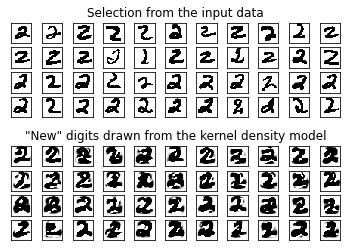

In [22]:
# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((28, 28)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((28, 28)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

## Only create Digits of One Type

best bandwidth: 30.39195382313198


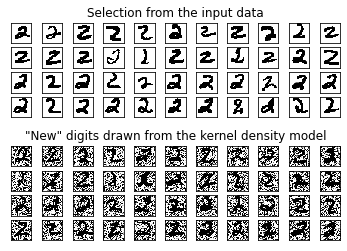

In [8]:
data = X
# use grid search cross-validation to optimize the bandwidth
params = {'bandwidth': np.logspace(-1, 3, 30)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)

print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

# use the best estimator to compute the kernel density estimate
kde = grid.best_estimator_
new_data = kde.sample(44, random_state=0)
new_data = new_data.reshape((4, 11, -1))
real_data = X[:44].reshape((4, 11, -1))
# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((28, 28)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((28, 28)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()